<a href="https://colab.research.google.com/github/Nk28-byte/MY-ASSIGNMENT/blob/main/SpamClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# First of all we are importing some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3224,ham,I need... Coz i never go before,NaN,NaN,NaN
4331,ham,ALSO TELL HIM I SAID HAPPY BIRTHDAY,NaN,NaN,NaN
2479,spam,Sppok up ur mob with a Halloween collection of...,NaN,NaN,NaN
2025,ham,"Yes obviously, but you are the eggs-pert and t...",NaN,NaN,NaN
834,ham,Surely result will offer:),NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
# 1. Data Cleaning
# 2. EDA
# 3. Text processing
# 4. Model Building
# 5. Evaluation

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.sample(5)

,v1,v2
4571,ham,Omg how did u know what I ate?
2339,ham,Cheers for the message Zogtorius. IåÕve been s...
3732,ham,Old Orchard near univ. How about you?
3338,ham,Babe !!!! I LOVE YOU !!!! *covers your face in...
1773,ham,"I'm not coming over, do whatever you want"


In [16]:
# Rename the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [17]:
df.sample(5)

,target,text
875,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å..."
3998,ham,K...k...when will you give treat?
2635,ham,Tiwary to rcb.battle between bang and kochi.
4075,spam,87077: Kick off a new season with 2wks FREE go...
1955,ham,"Aight I'll grab something to eat too, text me ..."


In [19]:
!pip install scikit-learn

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [21]:
df['target']=encoder.fit_transform(df['target'])

In [22]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
# remove missing values
df.isnull().sum()

,0
target,0
text,0


In [25]:
# check for duplicates
df.duplicated().sum()

403

In [27]:
df.drop_duplicates(inplace=True,keep='first')

In [28]:
df.shape

(5169, 2)

# Exploratory Data Analysis

In [29]:
df['target'].value_counts()

,count
target,
0,4516
1,653


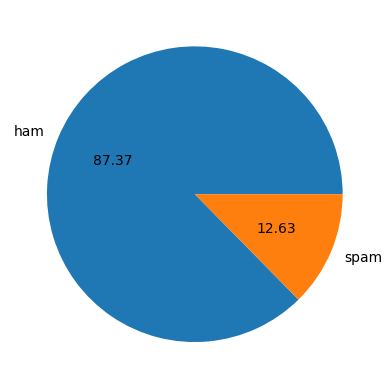

In [30]:
# Visualization
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [31]:
!pip install nltk

In [32]:
import nltk

In [33]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [34]:
df.columns

Index(['target', 'text'], dtype='object')

In [35]:
df['num_characters']=df['text'].apply(len)

In [36]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [38]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [39]:
#num of sentence
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentence'], dtype='object')

In [42]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
# the ham messages only
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

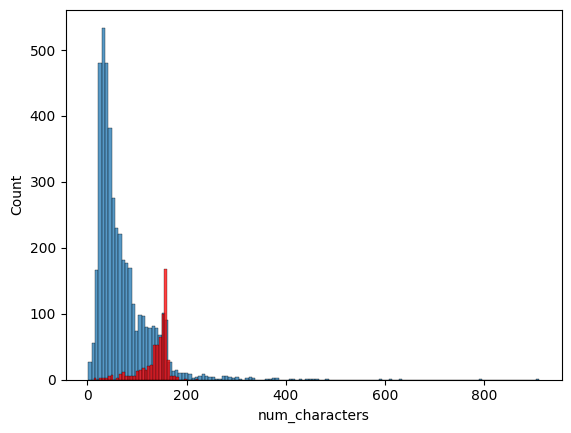

In [45]:
# Data Visualization module
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

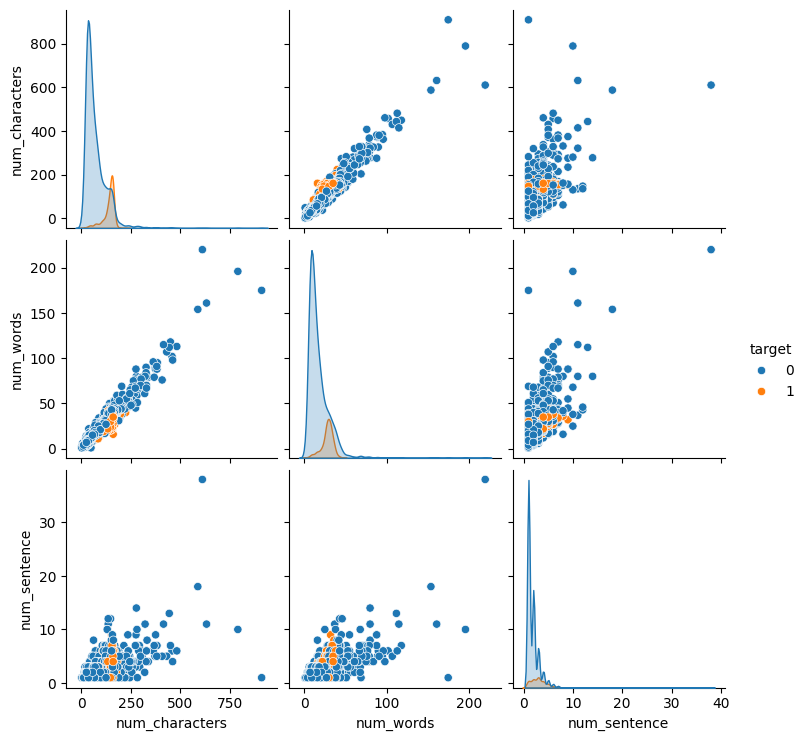

In [46]:
sns.pairplot(df,hue='target')

<Axes: >

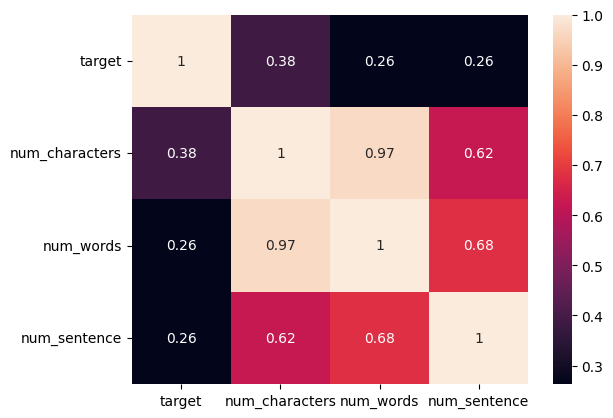

In [48]:
sns.heatmap(df[['target','num_characters','num_words','num_sentence']].corr(),annot=True)

# Data Processing

In [49]:
# lowercase
# tokenize
# remove special characters like , .! $
# stopword removal
# punctuation
# stemming

In [50]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [53]:
stopwords.words('english')
from nltk.stem.porter import PorterStemmer
stem=PorterStemmer()

In [54]:
import string

# transform(text)--->apply above methods --->clean data

In [101]:
def transform_text(text):
  text=text.lower()# lowercasing
  text=nltk.word_tokenize(text) #tokenize

  y=[]

  for i in text:
    if i.isalnum():
      y.append(i)
    text=y[:]
    y.clear()

    for i in text: # stop words removal and punct removal
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)

    text=y[:]
    y.clear()
    for i in text: # stemming
      y.append(stem.stem(i))

      return " ".join(y) if y else ""

In [102]:
transform_text("I'm am gonna be home soon and i don't want to talk about it.")

'gon'

In [103]:
df.head()

,target,text,num_characters,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go
1,0,Ok lar... Joking wif u oni...,29,8,2,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free
3,0,U dun say so early hor... U c already then say...,49,13,1,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah


In [104]:
df['transform_text']=df['text'].apply(transform_text)

In [105]:
df.head()

,target,text,num_characters,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go
1,0,Ok lar... Joking wif u oni...,29,8,2,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free
3,0,U dun say so early hor... U c already then say...,49,13,1,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah


In [106]:
import wordcloud
from wordcloud import wordcloud

In [107]:
wc=wordcloud.WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [108]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

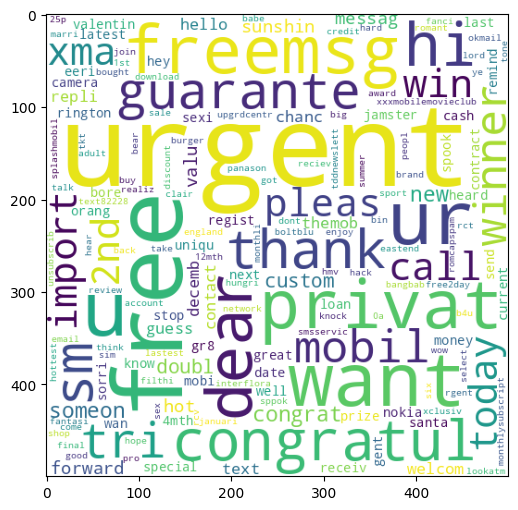

In [109]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [110]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

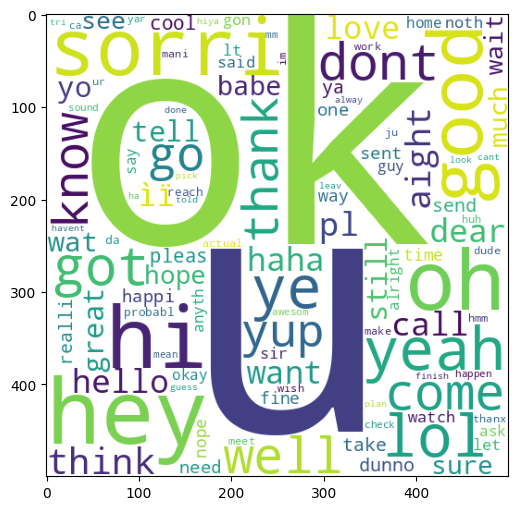

In [111]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [112]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [113]:
len(spam_corpus)

653

In [115]:
from collections import Counter

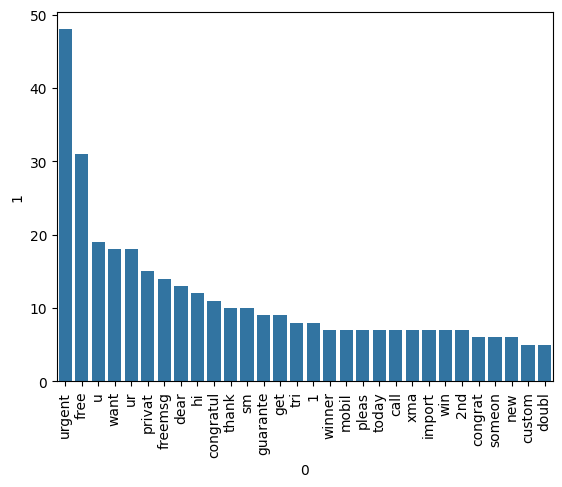

In [116]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [117]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
  if msg is not None: # Check if msg is not None
    for word in msg.split():
      ham_corpus.append(word) # Append word to ham_corpus (typo fixed)

In [118]:
len(ham_corpus)

4507

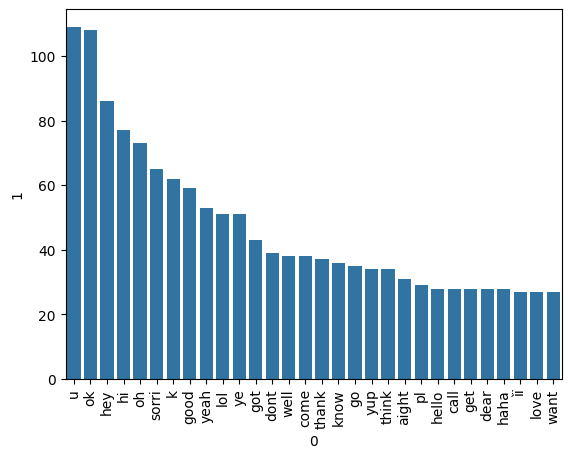

In [119]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [120]:
df.head()

,target,text,num_characters,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go
1,0,Ok lar... Joking wif u oni...,29,8,2,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free
3,0,U dun say so early hor... U c already then say...,49,13,1,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah


# Model Building

In [127]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [131]:
df = df.dropna(subset=['text'])
df['transform_text'] = df['text'].apply(transform_text)

In [132]:
df['transform_text'] = df['text'].apply(lambda x: transform_text(x) if x is not None else "")

In [134]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# ... (your previous code for data loading and cleaning) ...

# Initialize stemmer
stem = PorterStemmer()

def transform_text(text):
    """Transforms text by lowercasing, tokenizing, removing special characters,
    stop words, punctuation, and applying stemming.

    Args:
        text (str): The input text to transform.

    Returns:
        str: The transformed text.
    """
    if text is None:
        return ""  # Handle None values

    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(stem.stem(i))

    return " ".join(y)

# Apply the transform_text function to the 'text' column
df['transform_text'] = df['text'].apply(transform_text)

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Fit and transform the 'transform_text' column
X = tfidf.fit_transform(df['transform_text']).toarray()

In [137]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [138]:
X.shape

(5169, 3000)

In [140]:
X[0].shape

(3000,)

In [141]:
y=df['target'].values

In [142]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [144]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [145]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [147]:
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8597678916827853
[[778 121]
 [ 24 111]]
0.47844827586206895


In [150]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9613152804642167
[[899   0]
 [ 40  95]]
1.0


In [151]:
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9700193423597679
[[898   1]
 [ 30 105]]
0.9905660377358491


In [152]:
import pickle

In [154]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))